
<font size="8"> **Movie Recommendation 2022**</font>

© Explore Data Science Academy
** **
<br />

<img src="https://explore-datascience.net/images/images_admissions2/main-logo.jpg" width=600 height=100 />

<br />

** **

### Team Members



*   List item
*   List item
*   List item
*   List item
*   List item
*   List item



### Honour Code

We Team Cbb5, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


### Predict Overview:
In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing. See figure below adapted from [Kaggle](https://www.kaggle.com/competitions/edsa-movie-recommendation-2022/overview).

<br />

<center> <img src="https://research.aimultiple.com/wp-content/uploads/2017/08/recommendation-system.png" width=600 height=500 />

<br />

    
    


### Introduction
The movie industry has significantly evolved over the past decade, mainly driven by rapid technological advancements. In 1990's ad early 2000's a person would walk into a movie store (such as Mr. Video) and pick out a movie based  on his/her preferences. These preferences ranged from popularity and genre to lead actors/actresses and film directors. With the help of technology, companies participating in this industry are able to capitalize on this $91.83 Billion industry by creating reccomendation systems to ensure their customers recieve the most relevant content for their entertainment.

Considering a company like Netflix which has 222 million active subscribers (as of 2022), creating personalized recommendations for each individual is no simple task. This is where data scientists come into play. Data scientists use a series of computer science tools and algorthims to extract all the relevant information required to provide each user with content that best suits their preferences.

| ⚡ This notebook provides a detailed stepwise breakdown on the creation of a movie recommendation system ⚡ |
| :--------------------------- |


* What is a Movie Recommendation system?

A recommender system is an intelligent system that predicts the rating and preferences of users on products. The primary application of recommender systems is finding a relationship between user and products in order to maximise the user-product engagement

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Understand the Data</a>

<a href=#four>4. Clean Data (EDA)</a>

<a href=#five>5. Data Preprocessing (EDA)</a> 

<a href=#six>6. Exploratory Data Analysis (EDA)</a>

<a href=#seven>7. Data Engineering</a>

<a href=#eight>8. Model creation </a>

<a href=#nine>9. Model Improvements</a>

<a href=#ten>10. Model Evaluation</a>

<a href=#eleven>11. Discuss chosen methods logic</a>

<a href=#twelve>12. Conclusions</a>

<a href=#thirteen>13. Recommendations</a>




 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [54]:
# data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import timeit

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#modelling 
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from surprise.model_selection import cross_validate
from surprise import Reader, Dataset, SVD



## COMET

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---



<br />

<img src="https://miro.medium.com/max/1400/1*5qQEAEAZsCoOpptAeN4RBA.png" width=500 height=200 />

<br />

convenient way to import data from Kaggle directly to Google Colab notebook.


let’s install the Kaggle package that will be used for importing the data.

In [2]:
 !pip install -q kaggle

Then, save the json file with your credentials on your computer and upload this file to Colab using the code below:

In [3]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [ ]:
#Create a Kaggle directory
! mkdir ~/.kaggle 

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# copy the jason file to kaggle folder
! cp kaggle.json ~/.kaggle/

In [ ]:
# Permissions for the jason file to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 # To list all the dataset in kaggle
 ! kaggle datasets list

ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                           Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23          15324        447  1.0              
ruchi798/data-science-job-salaries                                 Data Science Job Salaries                             7KB  2022-06-15 08:59:12           3970        141  1.0              
zusmani/petrolgas-prices-worldwide                                 Petrol/Gas Prices Worldwide                          10KB  2022-06-24 01:25:33           1851         89  1.0              
imoore/age-dataset                           

Download Data

In [ ]:
!kaggle competitions download -c edsa-movie-recommendation-2022

edsa-movie-recommendation-2022.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Now we have to unzip the file 
!unzip edsa-movie-recommendation-2022.zip

Archive:  edsa-movie-recommendation-2022.zip
replace genome_scores.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
# import dataset
genome_score = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('genome_tags.csv')
imdb_data = pd.read_csv('imdb_data.csv')
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')


<a id="three"></a>
# 3. Understand the Data

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

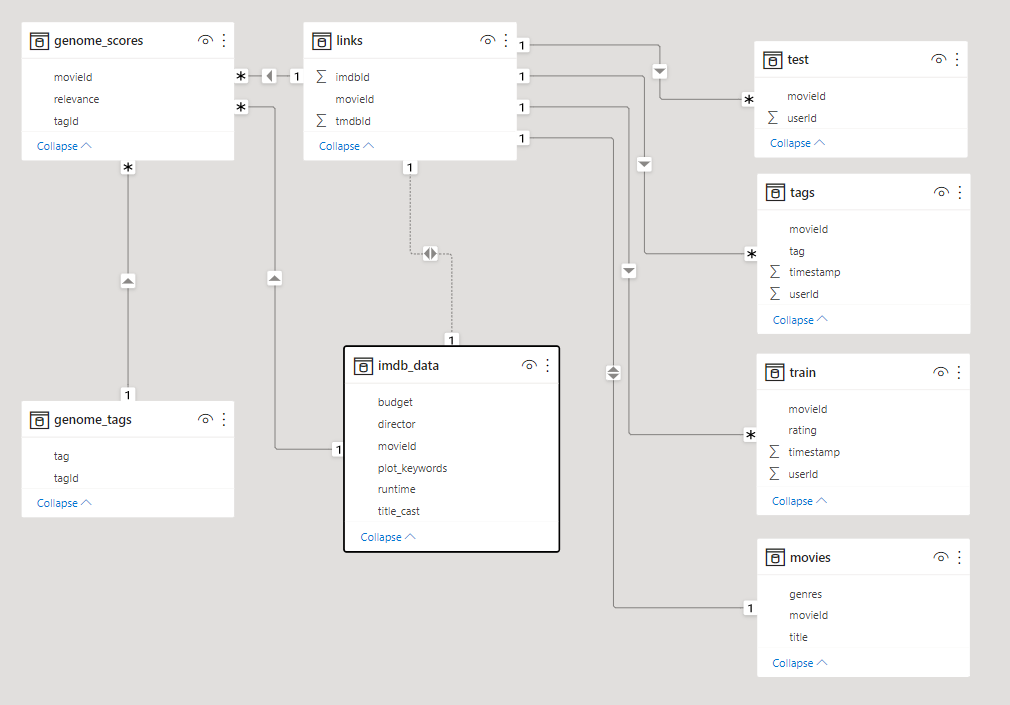

In [59]:
train.head()

22.1 µs ± 1.82 µs per loop (mean ± std. dev. of 3 runs, 10000 loops each)


In [5]:
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [6]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [7]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [9]:
imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [10]:
imdb_data.shape

(27278, 6)

In [11]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [12]:
genome_score.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


<a id="four"></a>
# 4. Cleaning Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Dataframe obviously has a relation between all the explored datasets as it have 'movieId' column in all the datasets. It was important to have such relation so that we would be able to concatenate the datasets. We can do so for train, movies and imdb_data dataframes before we clean the data.

In [13]:
dfs = [train, movies, imdb_data]
import functools as ft
data = ft.reduce(lambda left, right: pd.merge(left, right, on='movieId'), dfs)


Now let us view our new data and clean it

In [ ]:
data.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


The New "data" will give us more insights on Exploratory data Analysis (EDA) in section still to be covered in this notebook. So, let us clean this data if any missing data or any incorrect format is found.

In [ ]:
# Firtly, let look at info of our dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9633031 entries, 0 to 9633030
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   userId         int64  
 1   movieId        int64  
 2   rating         float64
 3   timestamp      int64  
 4   title          object 
 5   genres         object 
 6   title_cast     object 
 7   director       object 
 8   runtime        float64
 9   budget         object 
 10  plot_keywords  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 881.9+ MB


Notice, that we have varying # of non-null counts for some features. Hence this can show us that there are missing values in our data.

In [ ]:
# The sum to count the NaN values For dataset:
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)

userId            0.00
movieId           0.00
rating            0.00
timestamp         0.00
title             0.00
genres            0.00
title_cast       27.04
director         27.02
runtime          27.54
budget           32.72
plot_keywords    27.09
dtype: float64

In the info displayed above we see the presentage of null values mostly below 75 percent, hence we fill null values with mean and mode for numerical and categorical values respectively.

In [ ]:
# for tltle_cast as it categorical feature we employ mode
data['title_cast'] = data['title_cast'].fillna(data['title_cast'].mode()[0])
# for director as it categorical feature we employ mode
data['director'] = data['director'].fillna(data['director'].mode()[0])
# for runtime as it numerical feature we employ mean
data['runtime'] = data['runtime'].fillna(data['runtime'].mean())
# for budget as it categorical feature we employ mode
data['budget'] = data['budget'].fillna(data['budget'].mode()[0])
# for plot_keywords as it categorical feature we employ mode
data['plot_keywords'] = data['plot_keywords'].fillna(data['plot_keywords'].mode()[0])

Now let us veiw our dataset again

In [ ]:
# The sum to count the NaN values For dataset:
data.isnull().sum()

userId           0
movieId          0
rating           0
timestamp        0
title            0
genres           0
title_cast       0
director         0
runtime          0
budget           0
plot_keywords    0
dtype: int64

<a id="five"></a>
# 5.  Data Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In our data, we can extract the year a specific movie was released. Thus, this is done as follows:

In [ ]:
data['release_year']=data['title'].str[-5:-1] #extracting released year


Let us explore the new features in our dataset

In [ ]:
data.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,release_year
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,2008
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,2008
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,2008
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,2008
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,2008


<a id="six"></a>
# 6. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


Each machine learning algorithm requires different way to explore the dataset to get valuable insights.

**Unique Counts and Data Shape**

Firstly, an overview of how many distinct users and movies are included in the dataset. This can be easily achieved using df.nunique(axis = 0)and then plot it in a bar chart.

userId            162522
movieId            23544
rating                10
timestamp        8470980
title              23534
genres              1267
title_cast         14531
director            9995
runtime              258
budget              1222
plot_keywords      13791
release_year         166
dtype: int64


Text(0, 0.5, 'Unique counts')

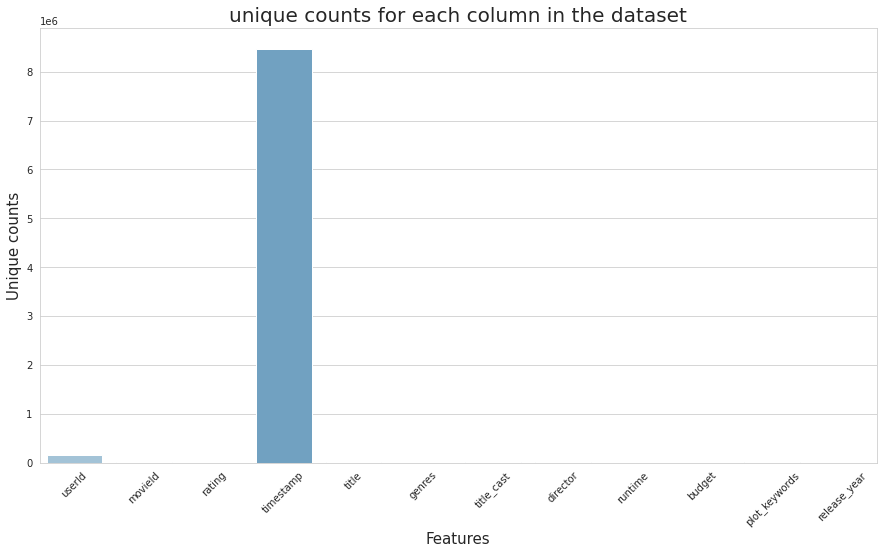

In [ ]:
# obtain unique counts for each column in the dataset

plt.figure(figsize = (15,8))
print(data.nunique(axis=0))
ax = sns.barplot(x=data.columns, y=data.nunique(axis=0), palette='Blues_d')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('unique counts for each column in the dataset', size=20)
plt.xlabel('Features', size=15)
plt.ylabel('Unique counts', size=15)


**Univariate Analysis**

Univariate analysis — the analysis of one feature at a time — helps us to better understand three questions:

* what are the movies with most reviews?
* who are the users that provide most reviews?
* how does the distribution looks like for ratings?

Text(0, 0.5, 'Frequency')

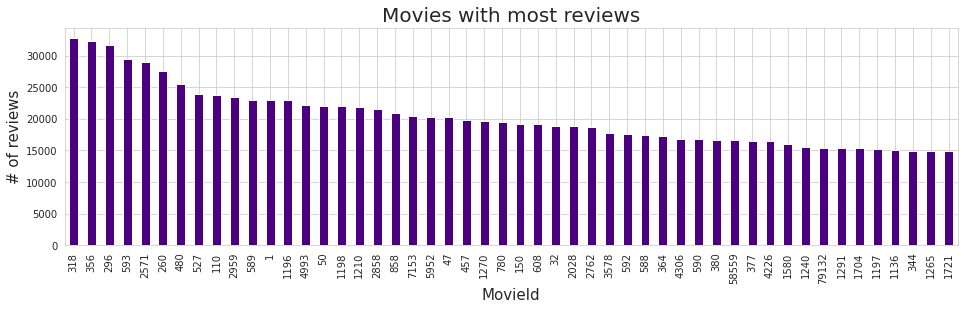

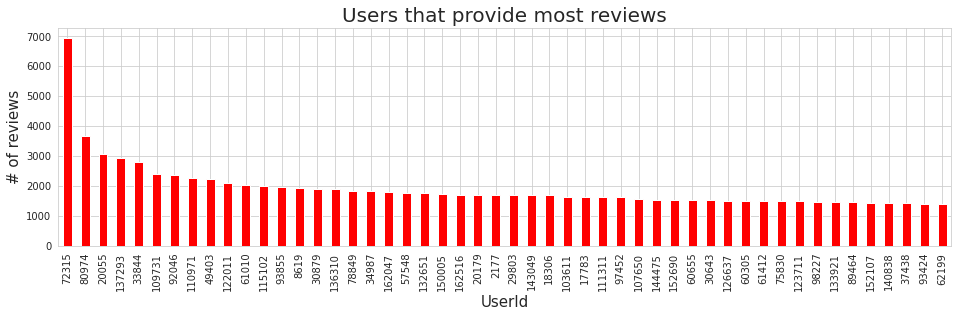

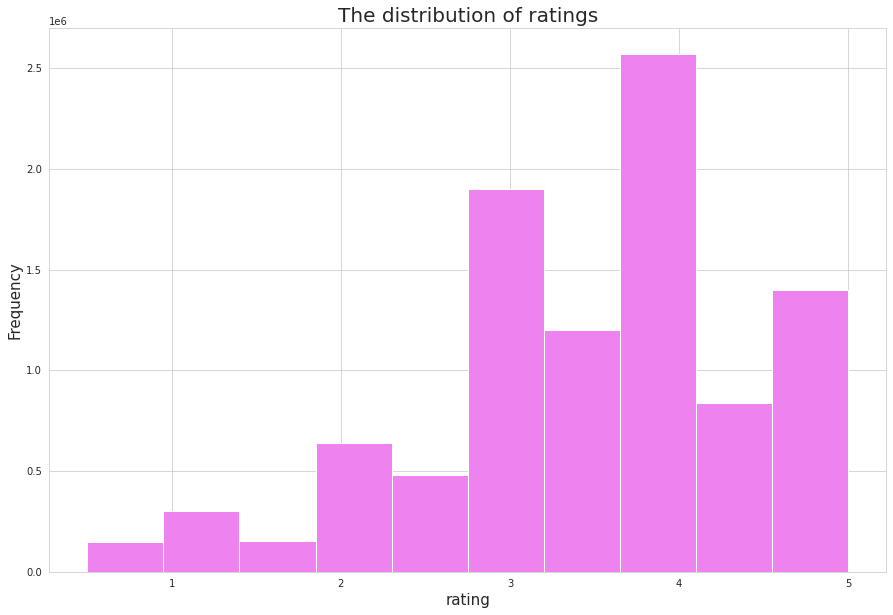

In [ ]:
# univariate analysis
plt.figure(1, figsize = (16,4))
data['movieId'].value_counts()[:50].plot(kind = 'bar', color="indigo") #take top 50 movies
plt.title('Movies with most reviews', size=20)
plt.xlabel('MovieId', size=15)
plt.ylabel('# of reviews', size=15)
plt.figure(2, figsize = (16,4))
data['userId'].value_counts()[:50].plot(kind = 'bar', color="red") #take top 50 users
plt.title('Users that provide most reviews', size=20)
plt.xlabel('UserId', size=15)
plt.ylabel('# of reviews', size=15)
plt.figure(3, figsize = (15,10))
data['rating'].plot(kind = 'hist', color="violet")
plt.title('The distribution of ratings', size=20)
plt.xlabel('rating', size=15)
plt.ylabel('Frequency', size=15)

Let’s create a ratings dataframe with average rating and number of ratings:

In [ ]:
# Calculate mean rating of all movies and check the popular high rating movies
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Wrestling for Jesus: The Tale of T-Money (2011)    5.0
The... Beautiful Country (1977)                    5.0
Only Daughter (2013)                               5.0
Vasermil (2007)                                    5.0
Day the Universe Changed, The (1985)               5.0
Name: rating, dtype: float64

Lets explore the # of people who actually gave ratings to a specific movie in "data".

In [ ]:
# Calculate count rating of all movies
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Shawshank Redemption, The (1994)    32831
Forrest Gump (1994)                 32383
Pulp Fiction (1994)                 31697
Silence of the Lambs, The (1991)    29444
Matrix, The (1999)                  29014
Name: rating, dtype: int64

 Let us create a dataframe with 'rating' count values

In [ ]:
New_data = pd.DataFrame(data.groupby('title')['rating'].mean())
 
New_data['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
 
New_data.head()

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",2.753731,67
$ (Dollars) (1971),2.875000,16
$5 a Day (2008),3.125000,20
$9.99 (2008),3.222222,27
$ellebrity (Sellebrity) (2012),2.250000,2


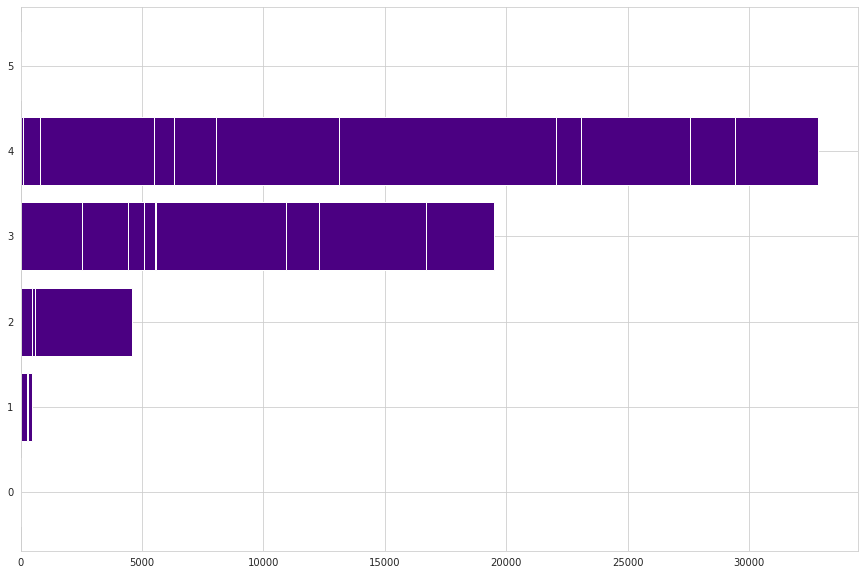

In [ ]:
#plot rounded-up ratings with number of movies
plt.figure(figsize =(15, 10))
ax=plt.barh(New_data['rating'].round(),New_data['num of ratings'],color='indigo')
plt.show()

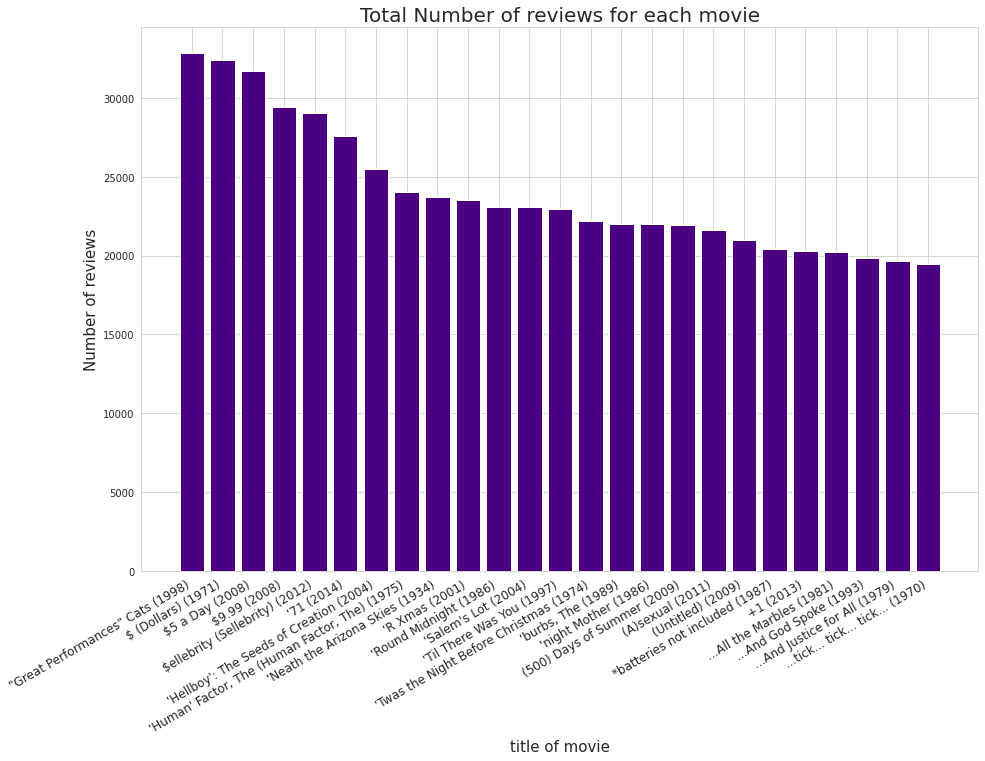

In [ ]:
#a bar graph descibibg number of reviews for first 25 movies
plt.figure(figsize =(15, 10))
ax=plt.subplot()
ax.bar(New_data.head(25).index,New_data['num of ratings'].sort_values(ascending=False).head(25),color='indigo')
ax.set_xticklabels(New_data.index,rotation=30,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of reviews for each movie", size=20)
plt.xlabel('title of movie', size=15)
plt.ylabel('Number of reviews', size=15)
plt.show()

Let us now explore the bar plot of '# of people rated feature'

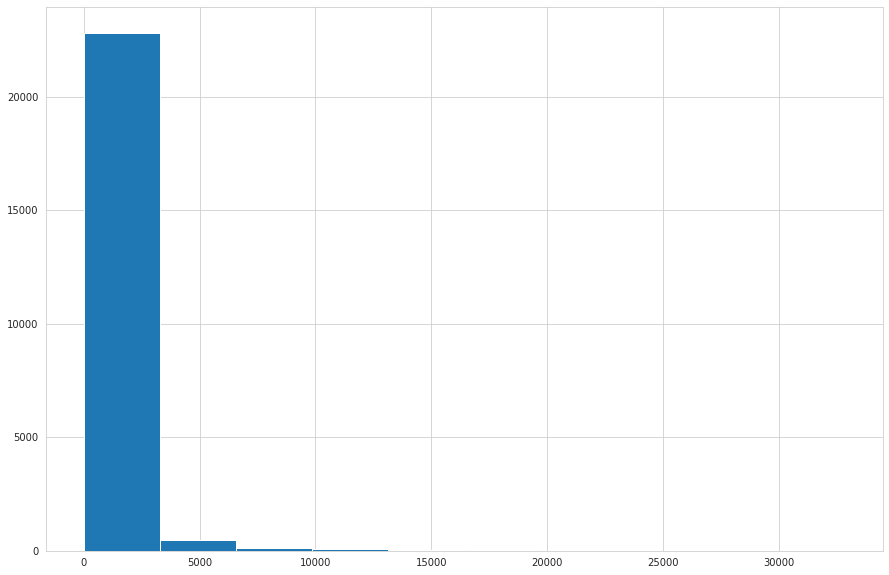

In [ ]:
plt.figure(figsize = (15,10))
New_data['num of ratings'].hist()

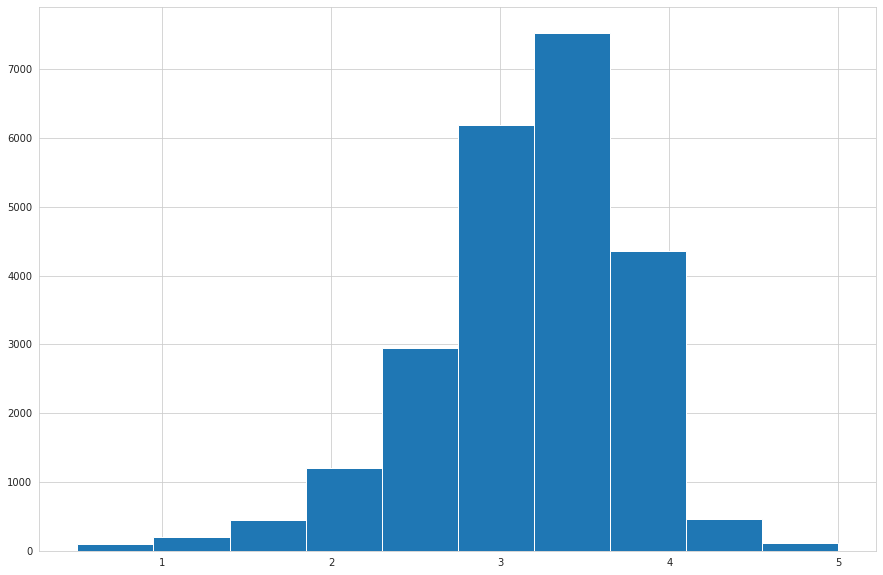

In [ ]:

# plot graph of 'ratings' column
plt.figure(figsize = (15,10))
 
New_data['rating'].hist()

Lets now explore the most rated movie:

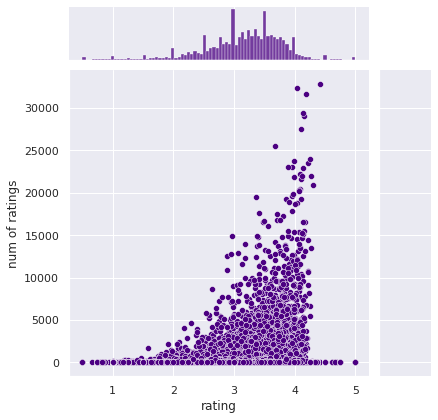

In [ ]:
sns.set(font_scale=1)
sns.jointplot(x=New_data['rating'],y=New_data['num of ratings'], color="indigo");


In the above joinplot it is clearly depicted that the movies with rating range from roughly 2 to 4 has the most number of ratings. Also, movies with about 5 rating has around 1 (No. of people rated) to it.

Lets just plot a Densityplot to have a look at the dense regions.

<Figure size 1080x720 with 0 Axes>

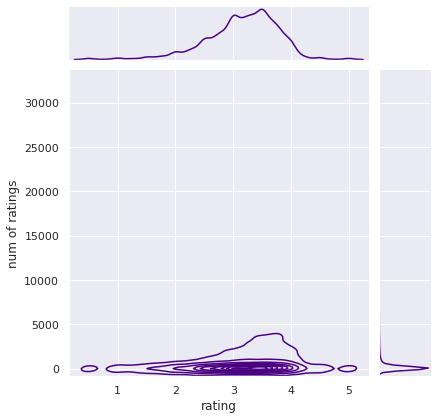

In [ ]:
plt.figure(figsize = (15,10))
sns.jointplot(x=New_data['rating'],y=New_data['num of ratings'],kind='kde', color="indigo");


Notice the dark black zone in the above density plot which represent most no. of datapoints almost have 2 to 4 star ratings. Dark regions generally represent the Dense region, which simply means alot of datapoints at that region.

Now let see the individual distributions of the features.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


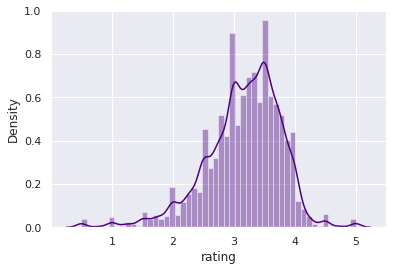

In [ ]:
sns.distplot(New_data['rating'], color="indigo");

It nearly have a Normal distribution with some negative skew

**Visualising the most popular Genres**

In [ ]:
genres = pd.DataFrame(data['genres'].
                      str.split("|").
                      tolist(),
                      index=data['movieId']).stack()
genres = genres.reset_index([0, 'movieId'])
genres.columns = ['movieId', 'Genre']
genres.head()

,movieId,Genre
0,57669,Comedy
1,57669,Crime
2,57669,Drama
3,57669,Thriller
4,57669,Comedy


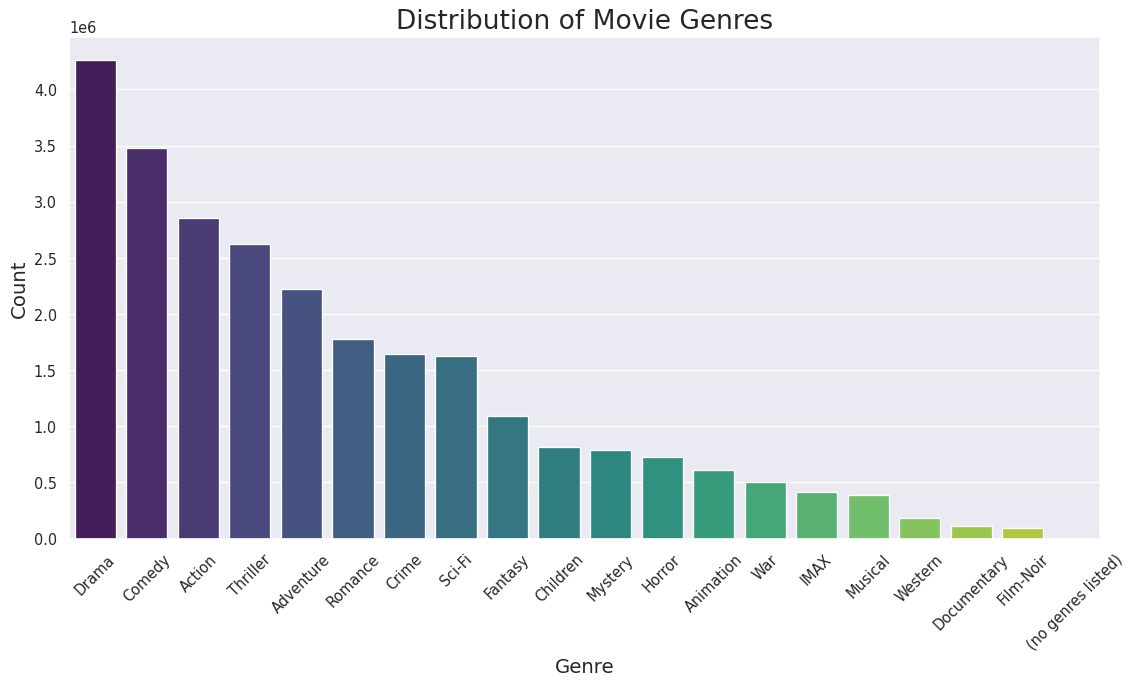

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7) , dpi=95)
sns.countplot(x='Genre',
              data=genres,
              palette='viridis',
              order=genres['Genre'].
              value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Genre', size=15)
plt.ylabel('Count', size=15)
plt.title('Distribution of Movie Genres', size=20)
plt.show()

Movies having the genre as Drama are maximum in number as compared to Film-Noir movies and Documentary movies. A
movie might have multipe genres.

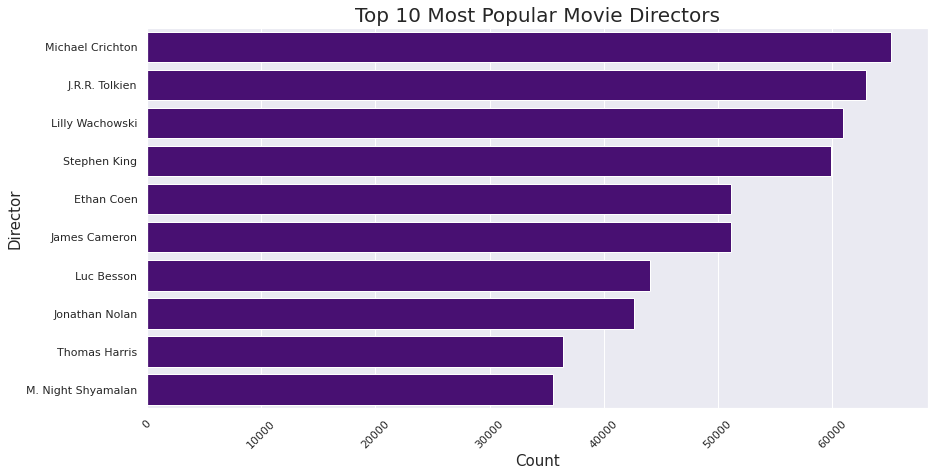

In [ ]:
# Plotting top 10 movie directors using a count-plot
plt.figure(figsize = (14,7))
director=data['director']
axes=sns.countplot(y=director, order = director.value_counts().index[1:11],color='indigo')
axes.set_title('Top 10 Most Popular Movie Directors',fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Count', size=15)
plt.ylabel('Director', size=15)
plt.show()

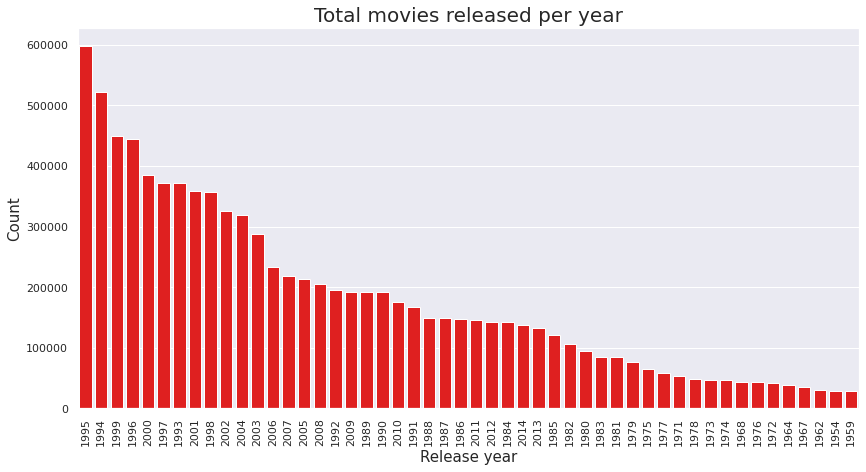

In [ ]:
# Plotting total amount of movies released in each year using a count plot.
figure= plt.subplots(figsize=(14, 7))
axes=sns.countplot(x=data['release_year'], order = data['release_year'].value_counts()[0:50].index,color='red')
axes.set_title('Total movies released per year',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('Count', size=15)
plt.xlabel('Release year', size=15)
plt.show()



*   List item
*   List item



Text(-61.75, 0.5, 'Unique counts')

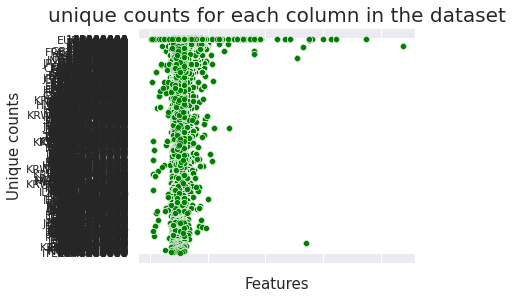

In [ ]:
ax = sns.scatterplot(data=data, x="runtime", y="budget", color="green")
ax.set_xticklabels(ax.get_yticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('unique counts for each column in the dataset', size=20)
plt.xlabel('Features', size=15)
plt.ylabel('Unique counts', size=15)



<a id="seven"></a>
# 7. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section the data is processed further, creating new features - as identified in the EDA phase. |

---

<a id="eight"></a>
# 8. Model Creation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, Recommender models are created inorder to accurately provide movie content. |



### Filtering strategies
---




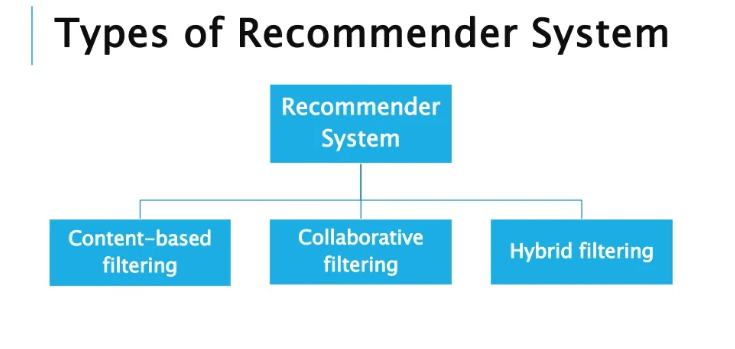

 ⚡8.1. Content Based filtering ⚡ 
 --------------------------- 
This filtering strategy provides movie recommendations based on the data provided about the item. The algorthim takes in data regarding movies that the users has liked in the past and provides new movie recommendations based on his/her past likes. The typical type of input data used by the algorthim are:
* Lead actor/actress
* Director
* Genre
* Production house
* Key words
* Cast 

..etc

##### Disadvantages of Content based filtering
1. Different products do not get much exposure to the user
2. Business expansion is limited since users will not get


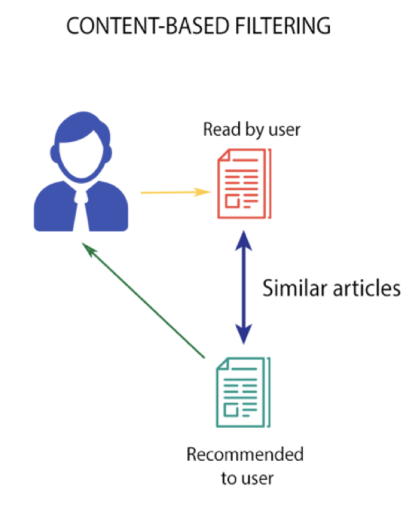

In [14]:
# Data preprocessing for Content based Filtering

# Split year from title, split genres and clean up data in movies dataframe
df_movies = pd.read_csv("movies.csv")
df_movies['title']=df_movies['title'].str.split('(')
df_movies['genres']=df_movies['genres'].str.split('|')
df_movies['Year']=df_movies['title'].str[1]
df_movies['title']=df_movies['title'].str[0]
df_movies['Year']=df_movies['Year'].str.replace(')','',regex=True)

# Remove end spaces
def remove_end_spaces(string):
    return "".join(string.rstrip())
df_movies['title']=df_movies['title'].apply(remove_end_spaces)

# Split cast and keywords and clean up data in imdb_data dataframe
imdb_data = pd.read_csv('imdb_data.csv')
imdb_data['title_cast']=imdb_data['title_cast'].str.split('|')
imdb_data['plot_keywords']=imdb_data['plot_keywords'].str.split('|')


content_input_data_df=''
content_input_data_df=imdb_data.merge(df_movies,on='movieId')
content_input_data_df['director'] = content_input_data_df['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
content_input_data_df['director'] = content_input_data_df['director'].apply(lambda x: [x,x, x])

content_input_data_df['input'] = content_input_data_df['plot_keywords'] + content_input_data_df['title_cast'] + content_input_data_df['director'] + content_input_data_df['genres']
content_input_data_df=content_input_data_df.dropna(subset=['input'])
content_input_data_df['input'] = content_input_data_df['input'].apply(lambda x: ' '.join(x))


In [15]:
content_input_data_df.shape

(14264, 10)

In [16]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(content_input_data_df['input'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [17]:
indices = pd.Series(np.array(list(range(0, content_input_data_df.shape[0]))), index=content_input_data_df['title'])

In [33]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return content_input_data_df['title'].iloc[movie_indices]

In [34]:
get_recommendations('Batman Begins').head(10)

1341             Batman Returns
12196          Dark Knight, The
17359    Dark Knight Rises, The
7952                   Catwoman
1506             Batman & Robin
14879                 Inception
151              Batman Forever
12711                RocknRolla
19631            Now You See Me
1681                  Hard Rain
Name: title, dtype: object

### Analyzing results

Looking at the above Recommendations for the movie 'Toy story', shows that the recommender system does provide a variety of movie suggestions which are in the same/similar genre as 'Toy story'. This model takes into account the Cast, Directors and Plot Key words.

The content based filtering however suffers from several limitations. It only suggests movies that are similar to each other on the specified set of variables used (Genre,Cast, Directors and Plot Key words). It does not allow for customized recommendations and personalized suggestions for each unique user. This recommendation system will provide the same recommendation for ANY user who watched a certain movie. 

In [20]:
df_movies[df_movies['title']=='The Dark Knight']

,movieId,title,genres,Year
27811,130219,The Dark Knight,"[Action, Crime, Drama, Thriller]",2011


In [21]:
df_movies[df_movies['title']=='Pressed']

,movieId,title,genres,Year
23224,117478,Pressed,"[Action, Crime, Drama, Thriller]",2011


In [22]:
content_input_data_df[content_input_data_df['title']=='The Dark Knight']

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres,Year,input
24667,130219,"[Kyle Walsh, Aaron Farb, Debra Lopez, Bruce Sp...","[drewmaxwell, drewmaxwell, drewmaxwell]",81.0,"$10,000","[death, assassin, creature, shadow]",The Dark Knight,"[Action, Crime, Drama, Thriller]",2011,death assassin creature shadow Kyle Walsh Aaro...


In [23]:
content_input_data_df[content_input_data_df['title']=='Pressed']

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres,Year,input
22535,117478,"[Luke Goss, Tyler Johnston, Jeffrey Ballard, M...","[justindonnelly, justindonnelly, justindonnelly]",88.0,"CAD3,200,000","[Action, Crime]",Pressed,"[Action, Crime, Drama, Thriller]",2011,Action Crime Luke Goss Tyler Johnston Jeffrey ...


 ⚡8.2. Collaborative Based filtering ⚡ 
 --------------------------- 
 
 Collaborative filtering is based on the combination of the users behavior and comparing and constrasting that with other users behavior in the database. The main difference between CONTENT based filtering and COLLABORATIVE based filtering is that the recommendations from collaborative based filtering are influenced by all users ratings of items while content based filtering mkaes recommendations using only the users data (and ratings)
 
 There are 2 types of Collaborative based filtering: 
 1. User based collaborative filtering
 
 This strategy finds and groups users that have similar past preference patterns.For example: If user A likes Avengers, Dr. Strange and Spiderman, while user B likes Spiderman, Thor and Avengers, this algorthim would identify that these users have similar preference. Hence the recommender system will recommend "Thor" to User A, and "Dr. Strange" to User B
 
###### Disadvantages of using User based collaborative filtering are:
 * Similarity patterns between users may no longer be relevant since user preferences may change and as this algorthim is based on user similarity.
 * There are generally more users and Movie items which significantly increases computational requirements and maintenance. 
 * Prone to Shilling attacks- This is when fake user profiles are created consisting of biased preference patterns which are then used to manipulate the algorthim. 
 
Considering the several disadvantages accompaning User based filtering, this notebook will only be covering "Item Based collaborative filtering"

2. Item based collaborative filtering

This filtering strategy finds similar movies instead of similar users. For example if we take 2 movies A and B, and check their ratings by all users who rated both the movies, and based on these ratings and similarities of users who rated both movies A and B, a recommendation will be made.

For example if Movies A and B has an average ration of 9 and 9.5 respectively, we can conclude that both these movies are similar and if a user provides a movie rating of 8.5 for movie A, he/she should be recommended to watch movie B considering they have similar ratings. 

###### Advantages of Item based collaborative filtering
* Movies do not change unlike peoples taste/preferences.
* There are less items than people hence lower computational requirements and maintenance.
* More robust against Shilling attaks since items cannot be fake (in comparasion to fake user accounts)

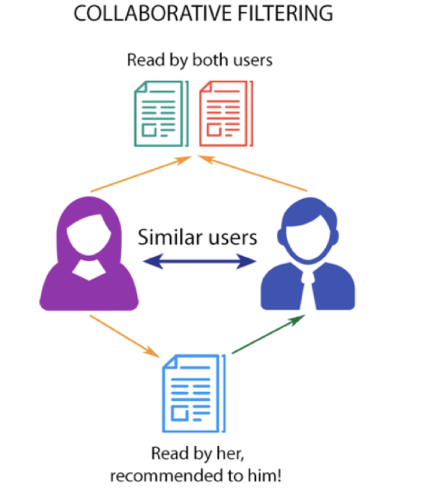

In [ ]:
### Code for Collaborative based filtering

Singular value decomposition (SVD) is a collaborative filtering method for movie recommendation. The aim for the code implementation is to provide users with movies’ recommendation from the latent features of item-user matrices. SVD is a method from linear algebra that has been generally used as a dimensionality reduction technique in machine learning. SVD is a matrix factorisation technique, which reduces the number of features of a dataset by reducing the space dimension from N-dimension to K-dimension (where K<N). In the context of the recommender system, the SVD is used as a collaborative filtering technique. It uses a matrix structure where each row represents a user, and each column represents an item. To find out more regarding SVD, please read the article of Singular Value Decomposition (SVD) & Its Application In Recommender System: https://analyticsindiamag.com/singular-value-decomposition-svd-application-recommender-system/

In [52]:
reader = Reader() #train

In [60]:
#%%timeit -r 3 -n 10000
data = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8345  0.8342  0.8346  0.8344  0.8332  0.8342  0.0005  
MAE (testset)     0.6336  0.6335  0.6337  0.6334  0.6324  0.6333  0.0005  
Fit time          585.63  634.24  603.02  623.97  648.40  619.05  22.32   
Test time         18.48   21.68   19.78   21.49   22.99   20.89   1.58    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8339  0.8343  0.8341  0.8331  0.8344  0.8340  0.0005  
MAE (testset)     0.6332  0.6337  0.6333  0.6324  0.6336  0.6332  0.0005  
Fit time          573.06  594.82  716.06  688.74  665.89  647.71  54.87   
Test time         17.89   20.09   25.41   26.92   21.66   22.39   3.34    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset

KeyboardInterrupt: 

In [61]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [62]:
#Inputs are User ID and Movie ID
svd.predict(1, 2011,verbose=True)

user: 1          item: 2011       r_ui = None   est = 3.34   {'was_impossible': False}


Prediction(uid=1, iid=2011, r_ui=None, est=3.336164838138205, details={'was_impossible': False})

In [63]:
help(svd.predict)

Help on method predict in module surprise.prediction_algorithms.algo_base:

predict(uid, iid, r_ui=None, clip=True, verbose=False) method of surprise.prediction_algorithms.matrix_factorization.SVD instance
    Compute the rating prediction for given user and item.
    
    The ``predict`` method converts raw ids to inner ids and then calls the
    ``estimate`` method which is defined in every derived class. If the
    prediction is impossible (e.g. because the user and/or the item is
    unknown), the prediction is set according to
    :meth:`default_prediction()
    <surprise.prediction_algorithms.algo_base.AlgoBase.default_prediction>`.
    
    Args:
        uid: (Raw) id of the user. See :ref:`this note<raw_inner_note>`.
        iid: (Raw) id of the item. See :ref:`this note<raw_inner_note>`.
        r_ui(float): The true rating :math:`r_{ui}`. Optional, default is
            ``None``.
        clip(bool): Whether to clip the estimation into the rating scale.
            For exampl

 ⚡8.3. Hybrid Recommendation System ⚡ 
 --------------------------- 

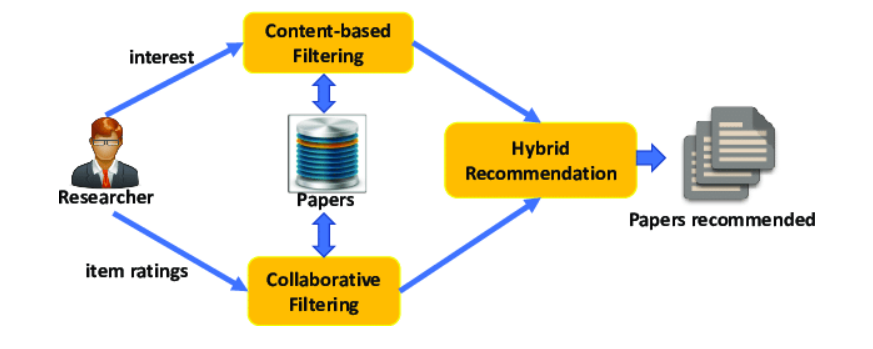

Hybrid Recommendation systems is a special type of recommendation system which is a combination of the content and collaborative filtering methodologies. This methodology together helps overcomes the shortcoming of both content and collaborative filtering when applied separately. Several studies have shown that hybrid models generate more accurate recommendations as compared to conventional approaches.

In [64]:

def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

df_links=links
df_link_hybrid=df_links[['movieId','tmdbId']]
df_link_hybrid['tmdbId']=df_link_hybrid['tmdbId'].apply(convert_int)
df_link_hybrid=df_link_hybrid.merge(content_input_data_df[['title','movieId']],on='movieId').set_index('title')
df_link_hybrid

C:\Users\980430~1\AppData\Local\Temp/ipykernel_11324/2366035223.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_link_hybrid['tmdbId']=df_link_hybrid['tmdbId'].apply(convert_int)


,movieId,tmdbId
title,,
Toy Story,1,862.0
Jumanji,2,8844.0
Grumpier Old Men,3,15602.0
Waiting to Exhale,4,31357.0
Father of the Bride Part II,5,11862.0
...,...,...
Kein Bund für's Leben,131254,4436.0
"Feuer, Eis & Dosenbier",131256,9274.0
The Pirates,131258,285213.0


In [65]:
df_link_hybrid_indices_map=df_link_hybrid.set_index('tmdbId')
df_link_hybrid_indices_map

,movieId
tmdbId,
862.0,1
8844.0,2
15602.0,3
31357.0,4
11862.0,5
...,...
4436.0,131254
9274.0,131256
285213.0,131258


In [89]:
content_input_data_df[content_input_data_df['title']=='Toy Story 2']#.head()

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres,Year,input
3020,3114,"[Tom Hanks, Tim Allen, Joan Cusack, Kelsey Gra...","[ashbrannon, ashbrannon, ashbrannon]",92.0,"$90,000,000","[toy, cgi animation, toy comes to life, 1990s]",Toy Story 2,"[Adventure, Animation, Children, Comedy, Fantasy]",1999,toy cgi animation toy comes to life 1990s Tom ...


In [101]:
df_link_hybrid_indices_map[df_link_hybrid_indices_map['movieId']==3114]

,movieId
tmdbId,
863.0,3114


In [107]:
content_input_data_df.iloc[1972][['title','movieId','Year']]

title      Toy Story 2
movieId           3114
Year              1999
Name: 3020, dtype: object

In [139]:
def hybrid(userId, title):
    idx = indices[title]
    
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
  
    
    movies = content_input_data_df.iloc[movie_indices][['title','movieId','Year',"genres"]]
    movieID=np.array(movies['movieId'])

    rating_predict=[0] * len(movieID)

    for x in range(len(movieID)):
        rating_predict[x]=svd.predict(userId, movieID[x])[3]
    
    #print(rating_predict)
    movies['est']=rating_predict
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)

In [140]:
hybrid(1, 'Toy Story')

,title,movieId,Year,genres,est
18109,Presto,95311,2008,"[Animation, Children, Comedy, Fantasy]",4.096253
1120,Wallace & Gromit: The Wrong Trousers,1148,1993,"[Animation, Children, Comedy, Crime]",3.932785
1192,"Grand Day Out with Wallace and Gromit, A",1223,1989,"[Adventure, Animation, Children, Comedy, Sci-Fi]",3.894593
23079,Toy Story Toons: Partysaurus Rex,120468,2012,"[Animation, Children, Comedy]",3.576558
20909,Dug's Special Mission,109425,2009,"[Animation, Children, Comedy]",3.494057
14758,Toy Story 3,78499,2010,"[Adventure, Animation, Children, Comedy, Fanta...",3.489638
4779,"Monsters, Inc.",4886,2001,"[Adventure, Animation, Children, Comedy, Fantasy]",3.458003
8245,"Incredibles, The",8961,2004,"[Action, Adventure, Animation, Children, Comedy]",3.424076
3020,Toy Story 2,3114,1999,"[Adventure, Animation, Children, Comedy, Fantasy]",3.406125
20294,Toy Story of Terror,106022,2013,"[Animation, Children, Comedy]",3.378631


In [93]:
svd.predict(1, 3114)

Prediction(uid=1, iid=3114, r_ui=None, est=3.406124687186122, details={'was_impossible': False})

<a id="nine"></a>
# 9.  Model Improvements
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="ten"></a>
# 10.  Model Evaluation |
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="eleven"></a>
# 11. Discuss chosen methods logic
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="twelve"></a>
# 12. Conclusions
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



<a id="thirteen"></a>
# 13. Recommendations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

# Submission file

In [306]:
test = pd.read_csv('test.csv')

userID=np.array(test['userId'])
movieID=np.array(test['movieId'])

rating_predict=[0] * test.shape[0]

for x in range(test.shape[0]):
    rating_predict[x]=svd.predict(userID[x], movieID[x])[3]
    

collaborative_submission=test
#collaborative_submission['id']=collaborative_submission['userId']+'_'+collaborative_submission['movieId']

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> dtype('<U21')

In [308]:
collaborative_submission['id']=collaborative_submission['userId'].astype(str)+'_'+collaborative_submission['movieId'].astype(str)
collaborative_submission['rating']=rating_predict

In [314]:
collaborative_submission.drop(['userId','movieId'],axis=1,inplace=True)


In [315]:
collaborative_submission

,id,rating
0,1_2011,3.429130
1,1_4144,4.238679
2,1_5767,3.481182
3,1_6711,3.836076
4,1_7318,3.272257
...,...,...
5000014,162541_4079,3.414469
5000015,162541_4467,4.010355
5000016,162541_4980,2.376938
5000017,162541_5689,2.818382


In [316]:
collaborative_submission.to_csv('collaborative_submission.csv',index=False)
